In [14]:
!pip install yfinance


In [15]:
import yfinance as yf
import pandas as pd
import sqlite3


In [16]:
ticker = "TSLA"
start = "2024-01-01"
end = "2024-12-31"


In [17]:
data = yf.download(ticker, start=start, end=end)
data.reset_index(inplace=True)
data.head()


/tmp/ipython-input-4210273901.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
1,2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2,2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
3,2024-01-05,237.490005,240.119995,234.899994,236.860001,92488900
4,2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


In [18]:
conn = sqlite3.connect("stocks.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS stock_prices (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    ticker TEXT,
    open REAL,
    high REAL,
    low REAL,
    close REAL,
    volume INTEGER
)
""")

conn.commit()


In [19]:
for _, row in data.iterrows():
    cursor.execute("""
    INSERT INTO stock_prices
    (date, ticker, open, high, low, close, volume)
    VALUES (?, ?, ?, ?, ?, ?, ?)
    """, (
        str(row['Date']),
        ticker,
        float(row['Open']),
        float(row['High']),
        float(row['Low']),
        float(row['Close']),
        int(row['Volume'])
    ))

conn.commit()


/tmp/ipython-input-3422847223.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Open']),
/tmp/ipython-input-3422847223.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['High']),
/tmp/ipython-input-3422847223.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Low']),
/tmp/ipython-input-3422847223.py:12: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(row['Close']),
/tmp/ipython-input-3422847223.py:13: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  int(row['Volume

In [20]:
recent = pd.read_sql_query("""
SELECT date, close
FROM stock_prices
WHERE ticker = ?
ORDER BY date DESC
LIMIT 5
""", conn, params=(ticker,))
recent


,date,close
0,"Ticker\n 2024-12-30\nName: 250, dtype: datet...",417.410004
1,"Ticker\n 2024-12-27\nName: 249, dtype: datet...",431.660004
2,"Ticker\n 2024-12-26\nName: 248, dtype: datet...",454.130005
3,"Ticker\n 2024-12-24\nName: 247, dtype: datet...",462.279999
4,"Ticker\n 2024-12-23\nName: 246, dtype: datet...",430.600006


In [21]:
avg_close = pd.read_sql_query("""
SELECT AVG(close) AS avg_price
FROM stock_prices
WHERE ticker = ?
""", conn, params=(ticker,))
avg_close


,avg_price
0,229.924821


In [22]:
lowest = pd.read_sql_query("""
SELECT date, close
FROM stock_prices
WHERE ticker = ?
ORDER BY close ASC
LIMIT 1
""", conn, params=(ticker,))
lowest


,date,close
0,"Ticker\n 2024-04-22\nName: 76, dtype: dateti...",142.050003


In [23]:
highest = pd.read_sql_query("""
SELECT date, close
FROM stock_prices
WHERE ticker = ?
ORDER BY close DESC
LIMIT 1
""", conn, params=(ticker,))
highest


,date,close
0,"Ticker\n 2024-12-17\nName: 242, dtype: datet...",479.859985


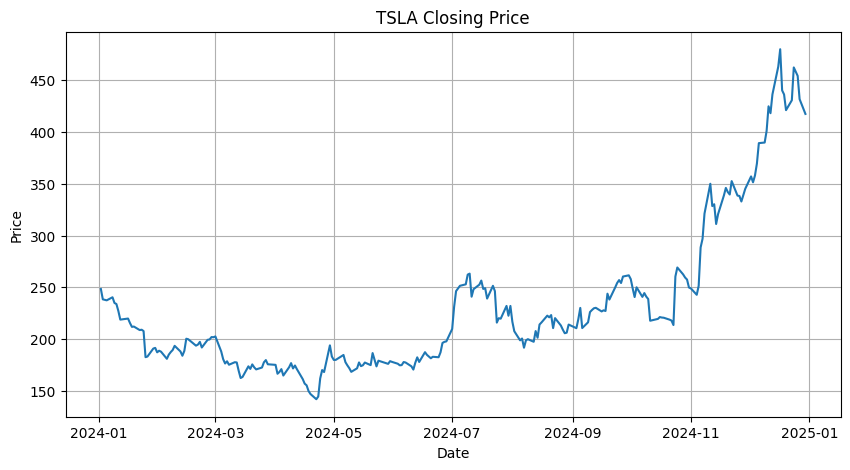

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'])
plt.title(f"{ticker} Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [25]:
conn.close()
